,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),especie,PC1,PC2,cluster_ms,cluster_gmm
0,5.1,3.5,1.4,0.2,setosa,-2.264703,0.480027,1,1
1,4.9,3.0,1.4,0.2,setosa,-2.080961,-0.674134,1,1
2,4.7,3.2,1.3,0.2,setosa,-2.364229,-0.341908,1,1
3,4.6,3.1,1.5,0.2,setosa,-2.299384,-0.597395,1,1
4,5.0,3.6,1.4,0.2,setosa,-2.389842,0.646835,1,1
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.870503,0.386966,0,2
146,6.3,2.5,5.0,1.9,virginica,1.564580,-0.896687,0,2
147,6.5,3.0,5.2,2.0,virginica,1.521170,0.269069,0,2
148,6.2,3.4,5.4,2.3,virginica,1.372788,1.011254,0,2


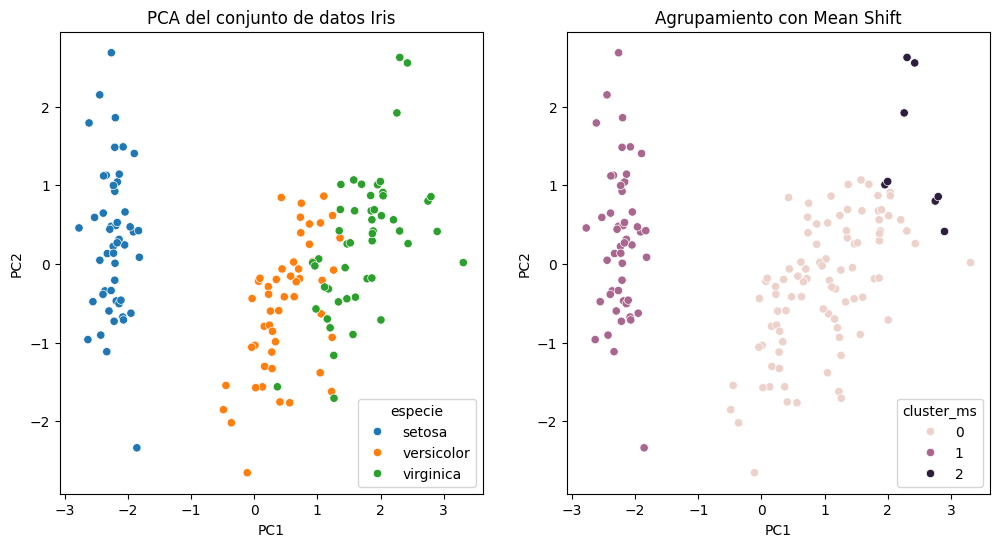

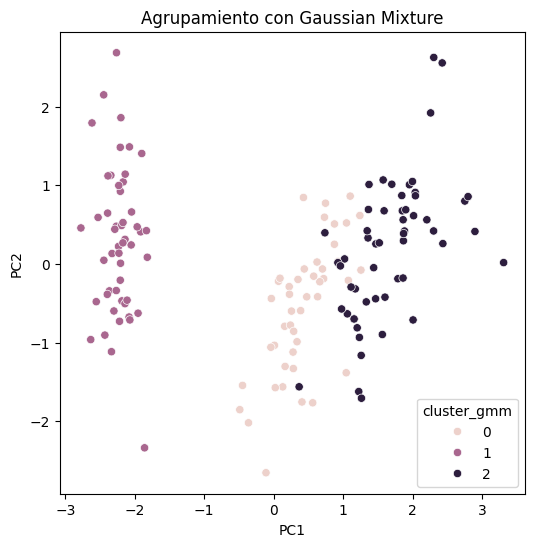

In [1]:
# Importa las bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

# Carga el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Crea un DataFrame de Pandas
df = pd.DataFrame(X, columns=feature_names)
df['especie'] = iris.target_names[y]

# Escalado de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Análisis de Componentes Principales (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PC1'] = X_pca[:, 0]
df['PC2'] = X_pca[:, 1]

# Agrupamiento con Mean Shift
bandwidth = estimate_bandwidth(X_scaled, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_scaled)
labels_ms = ms.labels_
df['cluster_ms'] = labels_ms

# Agrupamiento con Gaussian Mixture
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(X_scaled)
labels_gmm = gmm.predict(X_scaled)
df['cluster_gmm'] = labels_gmm

# Imprime la tabla del conjunto de datos gráficamente
display(df)

# Crea y muestra los gráficos
plt.figure(figsize=(12, 6))

# Gráfico de dispersión de los resultados de PCA
plt.subplot(1, 2, 1)
sns.scatterplot(x='PC1', y='PC2', hue='especie', data=df)
plt.title('PCA del conjunto de datos Iris')

# Gráfico de dispersión de los resultados del agrupamiento con Mean Shift
plt.subplot(1, 2, 2)
sns.scatterplot(x='PC1', y='PC2', hue='cluster_ms', data=df)
plt.title('Agrupamiento con Mean Shift')

plt.show()

# Gráfico de dispersión de los resultados del agrupamiento con Gaussian Mixture
plt.figure(figsize=(6, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster_gmm', data=df)
plt.title('Agrupamiento con Gaussian Mixture')

plt.show()